In [28]:
data_set = "dataset/SMILEsmileD/SMILEs"
output = "output"
# initialize the list of data and labels
data = []
labels = []

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from pipeline.nn.conv import LeNet
from imutils import paths
from matplotlib import pyplot
import imutils 
import numpy as np
import argparse
import cv2
import os

In [30]:
# loop over the input images
for imagePath in sorted(list(paths.list_images(data_set))):
    # load the image, pre-process it, and store it in the data list
    #print(imagePath)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = imutils.resize(image, width=32)
    image = cv2.resize(image, (28,28), interpolation=cv2.INTER_AREA)
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the label list
    label = imagePath.split(os.path.sep)[-3]
    label = "smiling" if label == "positives" else "not_smiling"
    labels.append(label)

count = 0
count_neg = 0
for i in range(len(labels)):
    if labels[i] == "smiling":
        count += 1
    else:
        count_neg += 1

print(count)
print(count_neg)

6500
6500


In [31]:
len(labels)
#labels

13000

In [32]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [33]:
labels

array(['not_smiling', 'not_smiling', 'not_smiling', ..., 'smiling',
       'smiling', 'smiling'], dtype='<U11')

In [34]:
# convert the labels from integers to vectors
le = LabelEncoder().fit(labels)
labels = to_categorical(le.transform(labels), 2)

# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [35]:
classTotals

array([6500., 6500.], dtype=float32)

In [36]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [37]:
print(len(trainX), len(trainY), len(testX), len(testY))

10400 10400 2600 2600


In [38]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=1, classes=2)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

[INFO] compiling model...


[INFO] training network...
Epoch 1/15
163/163 [==============================] - 3s 14ms/step - loss: 0.6531 - accuracy: 0.6459 - val_loss: 0.5825 - val_accuracy: 0.7285
Epoch 2/15
163/163 [==============================] - 2s 13ms/step - loss: 0.5274 - accuracy: 0.7548 - val_loss: 0.5171 - val_accuracy: 0.7581
Epoch 3/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4959 - accuracy: 0.7687 - val_loss: 0.5047 - val_accuracy: 0.7508
Epoch 4/15
163/163 [==============================] - 2s 13ms/step - loss: 0.4808 - accuracy: 0.7716 - val_loss: 0.4815 - val_accuracy: 0.7681
Epoch 5/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4669 - accuracy: 0.7823 - val_loss: 0.4689 - val_accuracy: 0.7796
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4604 - accuracy: 0.7859 - val_loss: 0.4613 - val_accuracy: 0.7827
Epoch 7/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4518 - accuracy: 0.7925 - val_loss: 0.

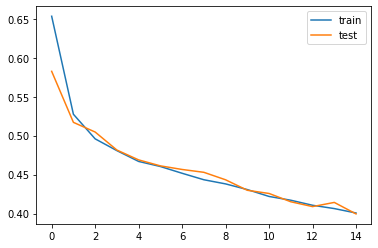

In [39]:
# train the network
# Max Pooling
print("[INFO] training network...")
H = model.fit(trainX, trainY, batch_size=64, epochs=15, validation_data=(testX, testY), verbose=1)
pyplot.plot(H.history['loss'], label='train')
pyplot.plot(H.history['val_loss'], label='test')
#pyplot.plot(H.history['accuracy'], label='acc')
#pyplot.plot(H.history['val_accuracy'], label='pre')
pyplot.legend()
pyplot.show()

In [40]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

 not_smiling       0.81      0.83      0.82      1300
     smiling       0.83      0.81      0.82      1300

    accuracy                           0.82      2600
   macro avg       0.82      0.82      0.82      2600
weighted avg       0.82      0.82      0.82      2600



[INFO] training network...
Epoch 1/15
163/163 [==============================] - 3s 13ms/step - loss: 0.6462 - accuracy: 0.6399 - val_loss: 0.5541 - val_accuracy: 0.7415
Epoch 2/15
163/163 [==============================] - 2s 12ms/step - loss: 0.5125 - accuracy: 0.7573 - val_loss: 0.5094 - val_accuracy: 0.7554
Epoch 3/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4954 - accuracy: 0.7631 - val_loss: 0.4966 - val_accuracy: 0.7646
Epoch 4/15
163/163 [==============================] - 2s 13ms/step - loss: 0.4849 - accuracy: 0.7683 - val_loss: 0.4857 - val_accuracy: 0.7642
Epoch 5/15
163/163 [==============================] - 2s 13ms/step - loss: 0.4761 - accuracy: 0.7728 - val_loss: 0.4799 - val_accuracy: 0.7750
Epoch 6/15
163/163 [==============================] - 2s 13ms/step - loss: 0.4685 - accuracy: 0.7768 - val_loss: 0.4744 - val_accuracy: 0.7727
Epoch 7/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4604 - accuracy: 0.7833 - val_loss: 0.

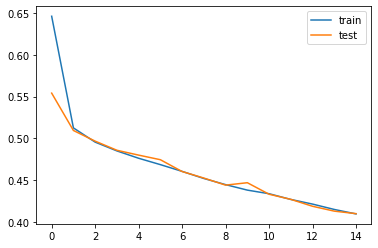

In [25]:
# train the network
# Average Pooling
print("[INFO] training network...")
H = model.fit(trainX, trainY, batch_size=64, epochs=15, validation_data=(testX, testY), verbose=1)
pyplot.plot(H.history['loss'], label='train')
pyplot.plot(H.history['val_loss'], label='test')
#pyplot.plot(H.history['accuracy'], label='acc')
#pyplot.plot(H.history['val_accuracy'], label='pre')
pyplot.legend()
pyplot.show()

In [26]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=le.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

 not_smiling       0.84      0.78      0.81      1300
     smiling       0.80      0.85      0.82      1300

    accuracy                           0.82      2600
   macro avg       0.82      0.82      0.82      2600
weighted avg       0.82      0.82      0.82      2600



In [41]:
# save the model to disk
model.save(output)

INFO:tensorflow:Assets written to: output\assets
